In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [101]:
data = pd.read_csv("loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [102]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [104]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [73]:
# fill null values by median
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [105]:
# to drop all null values from data set
data.dropna(inplace=True)

In [106]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [107]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [108]:
data.shape

(542, 13)

In [109]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

C:\Users\mohsi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohsi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohsi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohsi\anaconda3\lib\si

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

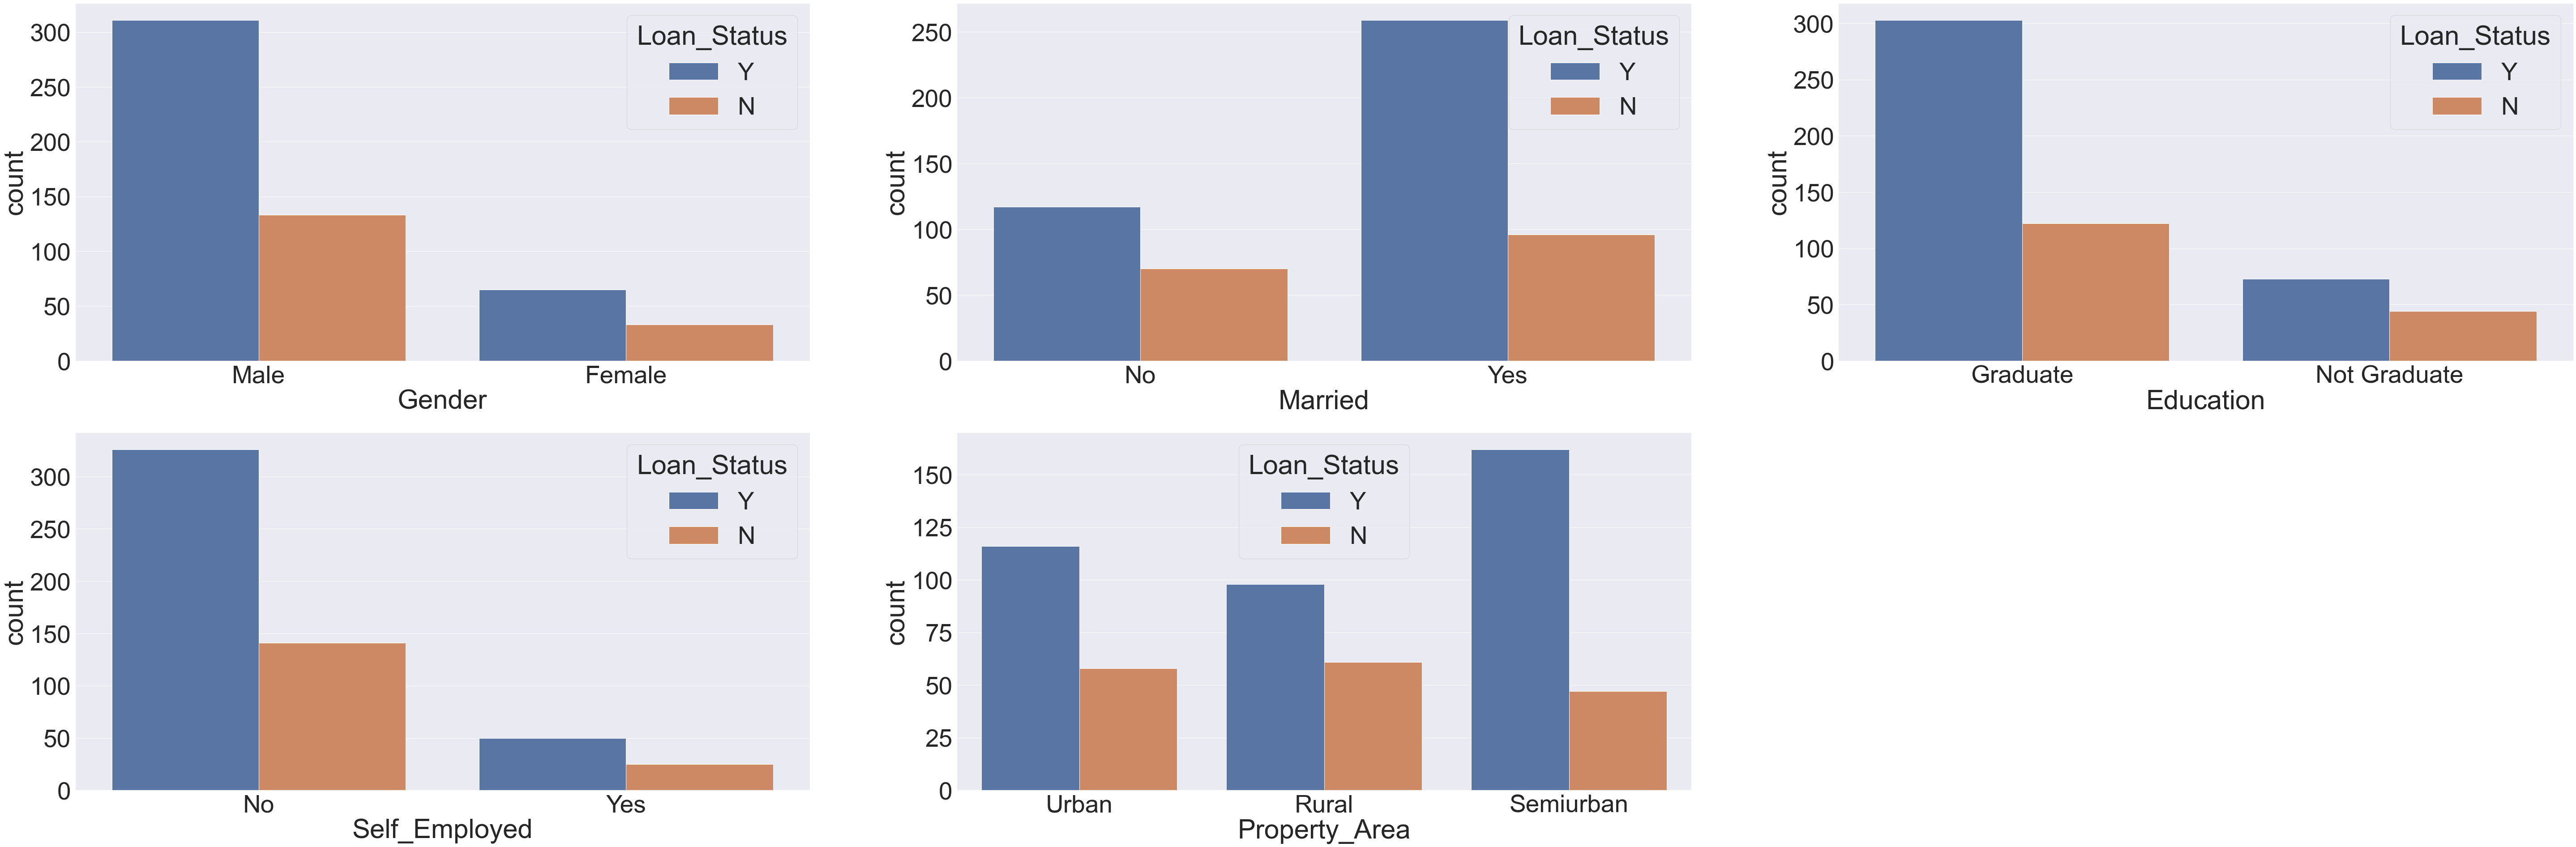

In [110]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)

plt.subplot(331)
sns.countplot(data['Gender'], hue=data['Loan_Status'])

plt.subplot(332)
sns.countplot(data['Married'], hue=data['Loan_Status'])

plt.subplot(333)
sns.countplot(data['Education'], hue=data['Loan_Status'])

plt.subplot(334)
sns.countplot(data['Self_Employed'], hue=data['Loan_Status'])

plt.subplot(335)
sns.countplot(data['Property_Area'], hue=data['Loan_Status'])

# Rplace the Variable values to Numeric
convert

In [111]:
data['Loan_Status'].replace('Y',1, inplace=True)
data['Loan_Status'].replace('N',0, inplace=True)

In [112]:
data['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [113]:
# values mapping
data.Gender = data.Gender.map({'Male':1, 'Female':0})
data['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [114]:
# values mapping
data.Married = data.Married.map({'Yes':1, 'No':0})
data['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [115]:
# values mapping
data.Dependents = data.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
data['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [116]:
# values mapping
data.Education = data.Education.map({'Graduate':1, 'Not Graduate':0})
data['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [117]:
# values mapping
data.Self_Employed = data.Self_Employed.map({'Yes':1, 'No':0, '3+':3})
data['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [118]:
# values mapping
data.Property_Area = data.Property_Area.map({'Urban':2, 'Rural':0, 'Semiurban':1})
data['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [132]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [133]:
data.drop('Loan_ID', axis=1, inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


# Splitting the data into train and test sets

In [137]:
# Model Training
X=data.drop('Loan_Status', axis=1)
y=data['Loan_Status']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [139]:
lr.fit(X_train, y_train)

C:\Users\mohsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
prediction= lr.predict(X_test)

In [144]:
confusion_matrix(y_test, prediction)

array([[ 20,  34],
       [  0, 109]], dtype=int64)

In [146]:
accuracy_score(y_test, prediction)*100

79.14110429447852